<a href="https://colab.research.google.com/github/AITrading1995/AITrading1995/blob/main/GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/rongardF/tvdatafeed.git
!pip  install -U git+https://github.com/twopirllc/pandas-ta
!pip install numpy==1.25.2

In [1]:
from tvDatafeed import TvDatafeed, Interval
import pandas_ta as ta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:

class Strategy:
  def __init__(self):
      self.close = None

  def download (self,symbol, exchange,bar):
    tv = TvDatafeed ()
    df = tv.get_hist(symbol=symbol, exchange=exchange,interval=Interval.in_1_hour,n_bars=bar)
    df.drop(columns='symbol', inplace=True)
    self.close = df['close']
    return df

class Dis_play(Strategy):
  def __init__(self):
    super().__init__()
  def line_plot(self,close):
    plt.figure(figsize=(14,8))
    plt.plot(self.close,label=f'Close price{symbol}')
    plt.title(f'Close price : {symbol}')
    plt.legend()
    plt.show()

In [18]:
symbol= 'XAUUSD'
exchange='OANDA'
bar=24*30

df = Strategy()
df = df.download (symbol, exchange,bar)

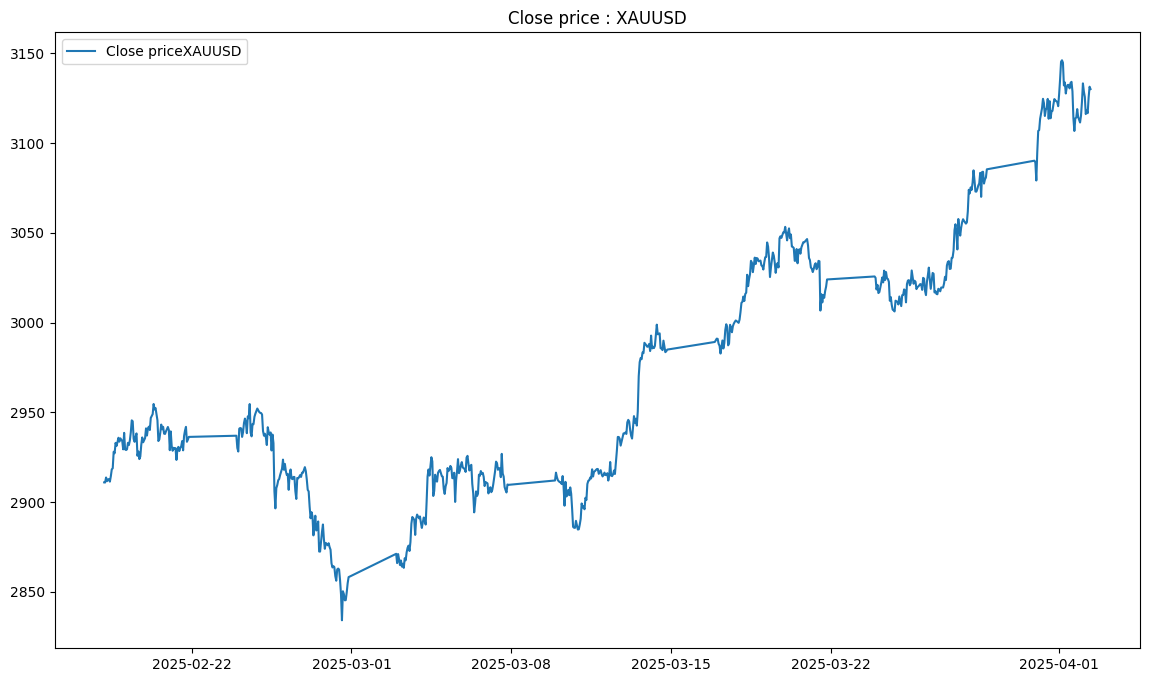

In [19]:
x = Dis_play()
df =x.download(symbol, exchange,bar)
x.line_plot(symbol)

In [20]:
log_return = np.log(df.close/df.close.shift(1))
mu = np.mean(log_return)
sigma = np.std(log_return)

In [21]:
#GBM Simulation

T = 24 #จำนวนวัน predict
SO = df['close'].iloc[-1]#วันล่าสุด
dt = 1 #คำนวนทีละวัน

random_shock = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt),size=T)

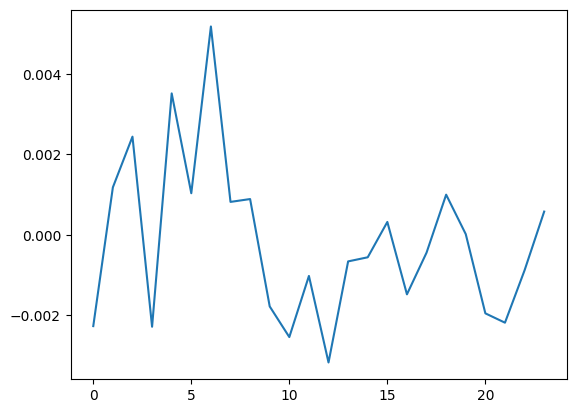

In [22]:
plt.plot(random_shock)

In [23]:
log_return_sim = np.cumsum(random_shock)

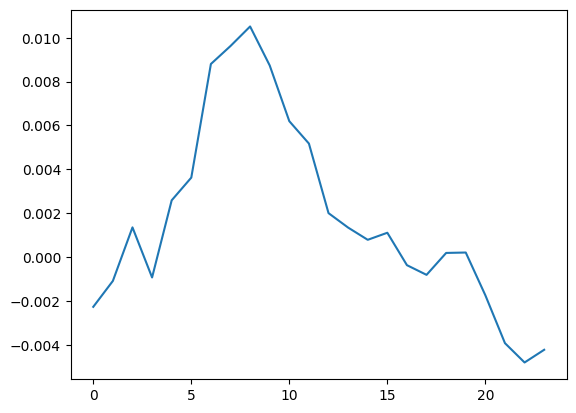

In [24]:
plt.plot(log_return_sim)

In [25]:
price_sim = SO*np.exp(log_return_sim)

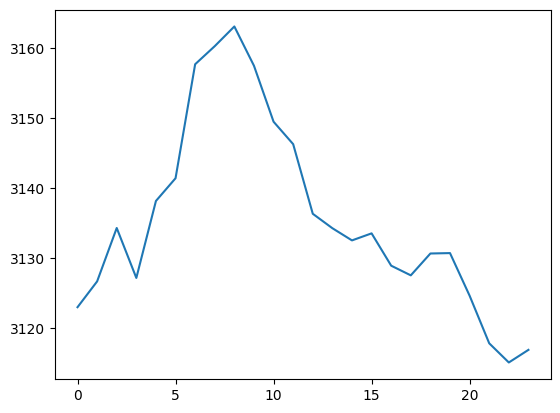

In [26]:
plt.plot(price_sim)
plt.show()

In [27]:
day_actual = np.arange(len(df['close']))
day_sim = np.arange(len(df['close']),len(df['close'])+T)

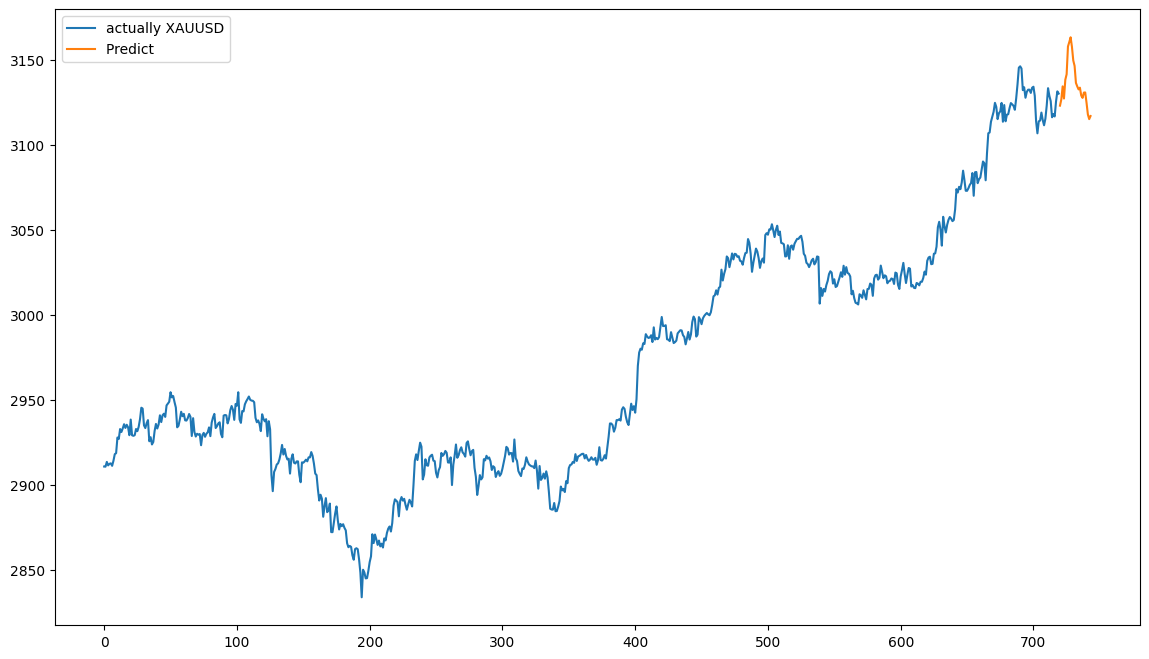

In [28]:
plt.figure(figsize=(14,8))
plt.plot(day_actual,df['close'],label=f'actually {symbol}')
plt.plot(day_sim,price_sim,label='Predict ')
plt.legend()
plt.show()